In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn 
import squarify
import matplotlib
import scipy.stats as st
from scipy.stats import linregress

In [2]:
file = "winemag-data_first150k.csv"

In [3]:
#read in csv 
df = pd.read_csv(file, low_memory=False)

#drop Unnamed column
df = df.drop("Unnamed: 0", axis=1)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB
None
              points          price
count  150930.000000  137235.000000
mean       87.888418      33.131482
std         3.222392      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000


In [4]:
#drop NaN values for country and price columns
mask = pd.notnull(df.country)
mask2 = pd.notnull(df.price)
clean_df = df.loc[mask & mask2].reset_index(drop=True)
clean_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
#get list of countries
clean_df.country.value_counts()

US                        62139
Italy                     18784
France                    14785
Spain                      8160
Chile                      5766
Argentina                  5587
Australia                  4894
Portugal                   4176
New Zealand                3070
Austria                    2483
Germany                    2347
South Africa               2237
Greece                      872
Israel                      610
Hungary                     230
Canada                      194
Romania                     139
Uruguay                      85
Croatia                      83
Slovenia                     81
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       50
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

In [6]:
#look to see if US-France is a legitimate option for country
mask3 = clean_df.country == "US-France"
clean_df.loc[mask3]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
130712,US-France,"Defies categorization, in more ways than one. ...",NaN,88,50.0,Santa Barbara County-Condrieu,NaN,NaN,Viognier,Deux C


In [7]:
#Look at top ten countries to see the spread
top10 = clean_df.country.value_counts()[0:10].sort_values(ascending=True)

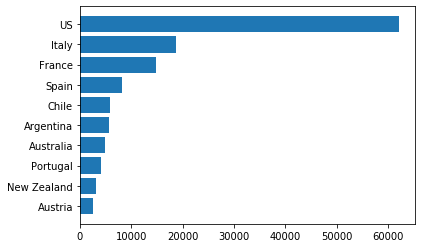

In [8]:
plt.barh(top10.index, top10.values)
plt.show()

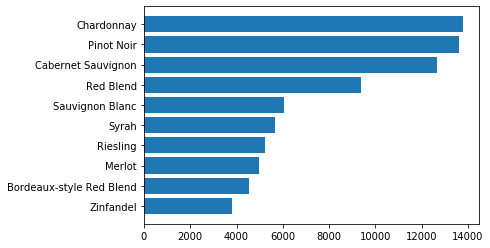

In [9]:
#Look at top ten varieties to see the spread
variety10 = clean_df.variety.value_counts()[0:10].sort_values(ascending=True)
plt.barh(variety10.index, variety10.values)
plt.show()

In [10]:
#get varieties of wine for red vs white categorization 
counts = clean_df.variety.value_counts()
counts

Chardonnay            13775
Pinot Noir            13625
Cabernet Sauvignon    12671
Red Blend              9377
Sauvignon Blanc        6054
                      ...  
Huxelrebe                 1
Carineña                  1
Tinta Barroca             1
Bombino Bianco            1
Catalanesca               1
Name: variety, Length: 619, dtype: int64

In [11]:
#export to csv 
counts.to_csv("Wine.csv", index=True)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [12]:
#look at spread of all varieties
#plt.bar(counts.index, counts.values)
#plt.show()

In [13]:
#read in csv with comparison - since only goes through varieties >= 30 wines, drop any that aren't assigned
reds = pd.read_csv('Wine_Reds.csv').dropna()

#rename column for the merge
reds = reds.rename(columns = {"Variety":"variety"})
reds.head()

,variety,Counts,Red?
0,Chardonnay,13775,False
1,Pinot Noir,13625,True
2,Cabernet Sauvignon,12671,True
3,Red Blend,9377,True
4,Sauvignon Blanc,6054,False


In [14]:
#merge the dataframes - merge function will fill in T/F for the value 
temp = pd.merge(clean_df,reds,on = "variety", how = "left")

#bring back only the fields that have values for red vs white
mask5 = pd.notnull(temp["Red?"])
wine_df = temp.loc[mask5].reset_index(drop=True)
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12671.0,True
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,221.0,True
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,6054.0,False
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,221.0,True


In [15]:
#cast boolean arguments as integers to be able to incorporate into model
wine_df['Still_Red'] = wine_df['Red?'].astype(int)

In [16]:
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12671.0,True,1
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,221.0,True,1
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,6054.0,False,0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,221.0,True,1


In [17]:
#create df with only red wines and look at distribution of wines by country 
mask_red = wine_df.Still_Red == 1
wine_red = wine_df.loc[mask_red]
wine_red.country.value_counts()

US                44550
Italy             13365
France             8021
Spain              6510
Argentina          4735
Chile              4060
Australia          3314
Portugal           2982
Austria            1620
South Africa       1277
New Zealand        1129
Greece              513
Israel              470
Germany             192
Hungary              80
Uruguay              72
Romania              64
Canada               61
Mexico               42
Moldova              42
Bulgaria             42
Slovenia             25
Brazil               24
Cyprus               23
Lebanon              23
Turkey               22
Croatia              16
Lithuania             8
Georgia               7
Morocco               7
Macedonia             6
England               6
Ukraine               4
India                 4
Serbia                3
Czech Republic        2
Switzerland           2
Name: country, dtype: int64

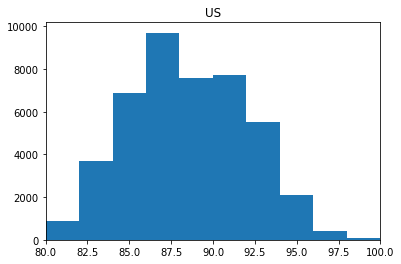

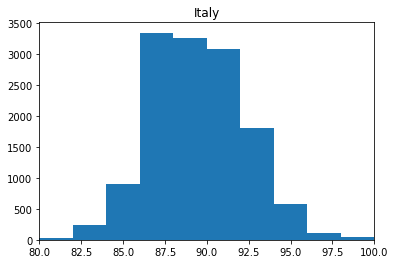

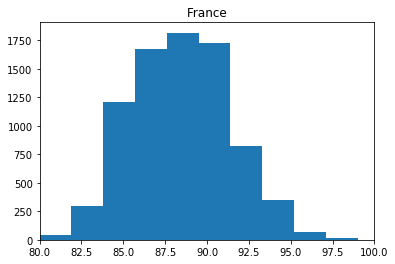

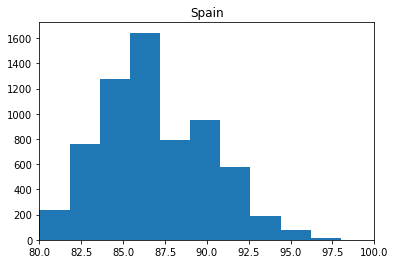

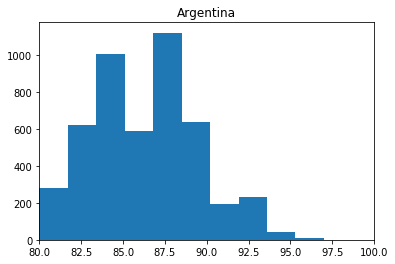

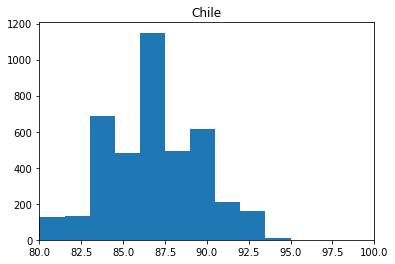

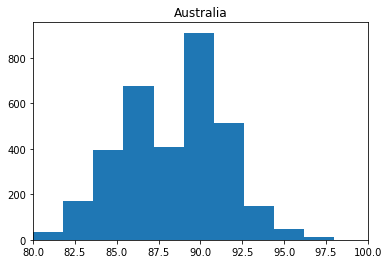

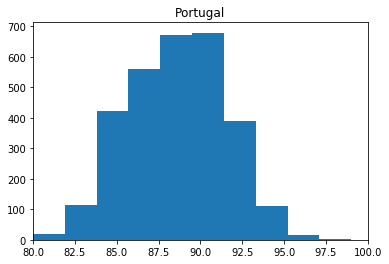

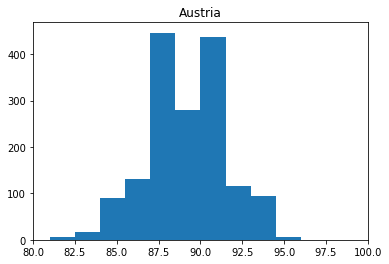

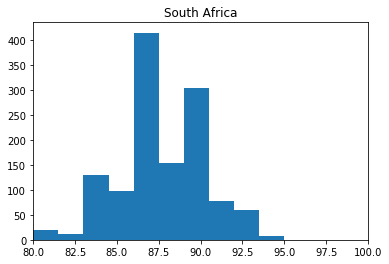

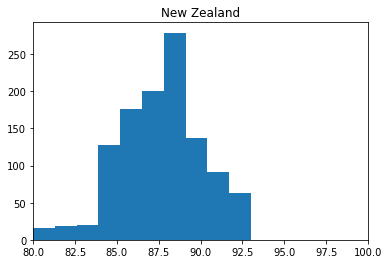

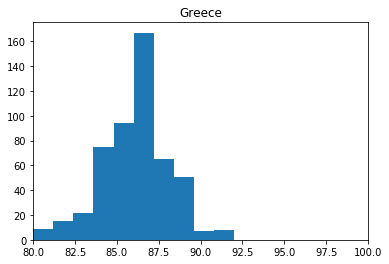

In [18]:
#print histograms for the top thirteen countries - WHY DID WE PICK THIRTEEN? 
for country in wine_red.country.value_counts().index[0:12]:
    mask6 = wine_red.country == country 
    red_wine = wine_red.loc[mask6]
    
    plt.hist(red_wine.points, bins = 10)
    plt.xlim(80,100)
    plt.title(country)
    plt.show()

In [19]:
#create df with top thirteen red wine producing countries
mask8 = wine_red.country.isin(wine_red.country.value_counts().head(13).index)
red2 = wine_red.loc[mask8]
red2.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12671.0,True,1
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,221.0,True,1
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,221.0,True,1
5,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,221.0,True,1


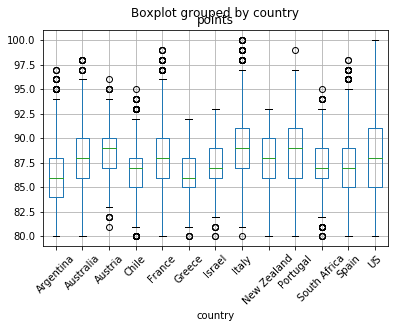

In [20]:
#plot the points spread for each of the top thirteen countries 
#NEED TO CLEAN UP GRAPHS - FIX TITLE AND AXIS LABELS 
red2.boxplot(column = 'points', by = 'country', rot = 45)
plt.show()

(-2, 1500)

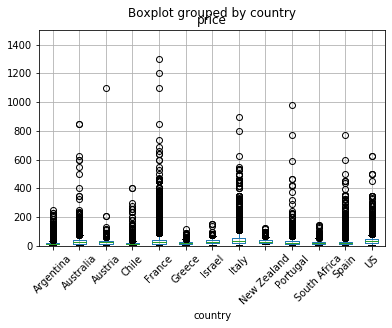

In [21]:
#boxplots to show price distribution by country - THIS WILL BE GOOD TO SHOW IMPACT OF OUTLIERS
ax1 = red2.boxplot(column = 'price', by = 'country', rot = 45)
ax1.set_ylim(-2,1500)

In [22]:
#create df for white wines only 
mask_white = wine_df.Still_Red == 0
wine_white = wine_df.loc[mask_white]
wine_white.country.value_counts()


US                17021
France             6467
Italy              4785
Germany            2109
New Zealand        1936
Chile              1626
Australia          1500
Spain              1217
Portugal            926
South Africa        920
Argentina           800
Austria             750
Greece              290
Israel              128
Canada              120
Hungary             116
Romania              57
Slovenia             46
Moldova              25
Bulgaria             25
Croatia              20
Mexico               18
Lebanon              13
Uruguay              10
Luxembourg            9
Georgia               5
India                 4
Morocco               4
China                 3
Slovakia              3
Serbia                2
Cyprus                2
Turkey                2
England               2
Switzerland           1
Czech Republic        1
Brazil                1
Ukraine               1
US-France             1
Name: country, dtype: int64

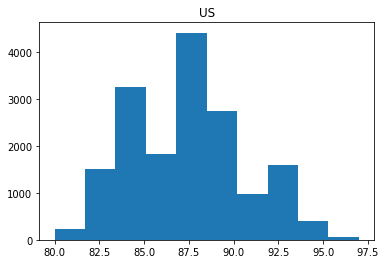

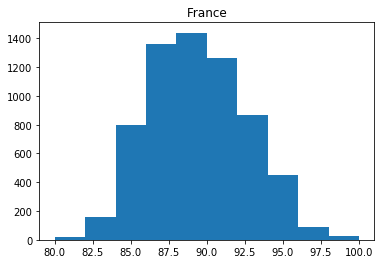

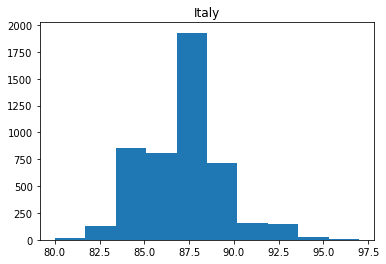

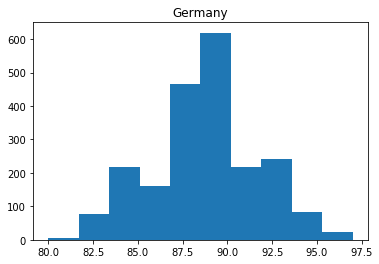

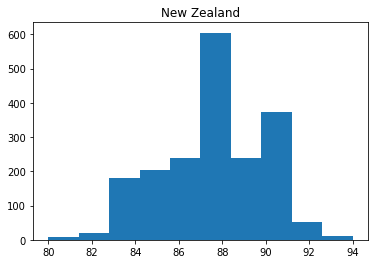

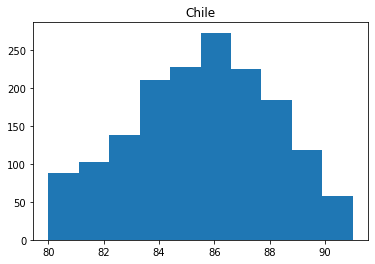

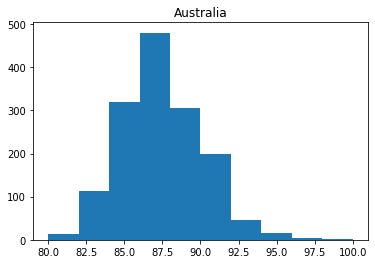

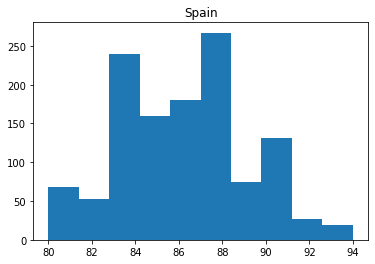

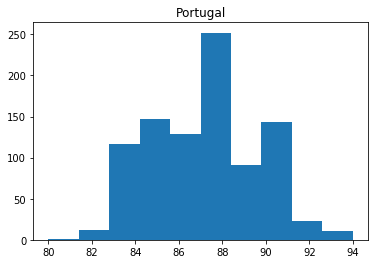

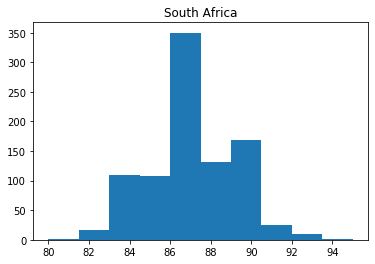

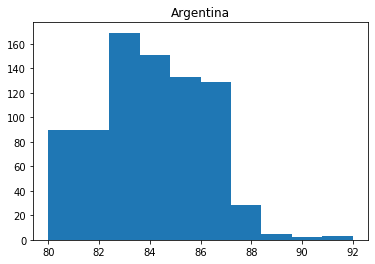

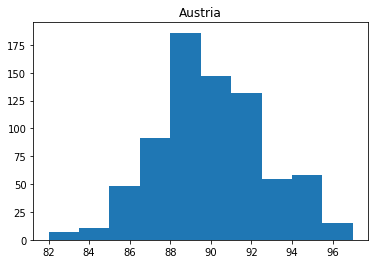

In [23]:
#create histograms for the top thirteen wines 
for country in wine_white.country.value_counts().index[0:12]:
    mask7 = wine_white.country == country 
    white_wine = wine_white.loc[mask7]
    
    plt.hist(white_wine.points, bins = 10)
    plt.title(country)
    plt.show()

In [24]:
#create df for top thirteen wines
mask9 = wine_white.country.isin(wine_white.country.value_counts().index[0:12])
white2 = wine_white.loc[mask9]
white2.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,6054.0,False,0
14,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström,13775.0,False,0
22,US,The apogee of this ambitious winery's white wi...,Giallo Solare,95,60.0,California,Edna Valley,Central Coast,Chardonnay,Center of Effort,13775.0,False,0
24,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River,13775.0,False,0
29,US,"Steely and perfumed, this wine sees only 20% n...",Babushka,90,37.0,California,Russian River Valley,Sonoma,Chardonnay,Zepaltas,13775.0,False,0


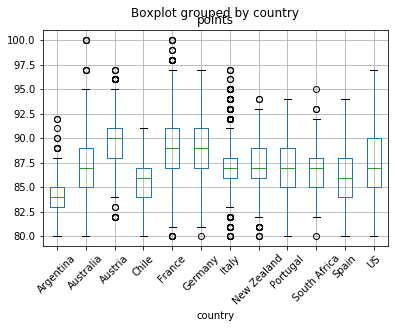

In [25]:
#boxplots to show point distribution by country 
white2.boxplot(column = 'points', by = 'country', rot = 45)
plt.show()

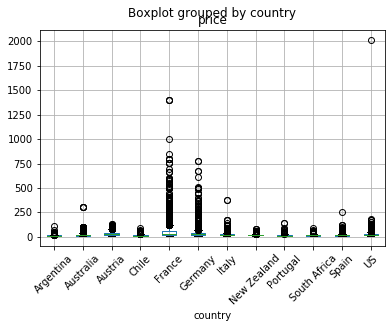

In [26]:
#boxplots to show price distribution by country - THIS WILL BE GOOD TO SHOW IMPACT OF OUTLIERS
ax1 = white2.boxplot(column = 'price', by = 'country', rot = 45)
plt.show()

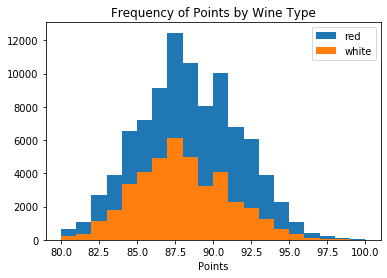

In [27]:
plt.hist(wine_red.points, label = "red", bins = 20)
plt.hist(wine_white.points, label = 'white', bins = 20)
plt.title ('Frequency of Points by Wine Type')
plt.xlabel('Points')
plt.legend(loc="best")
plt.show()

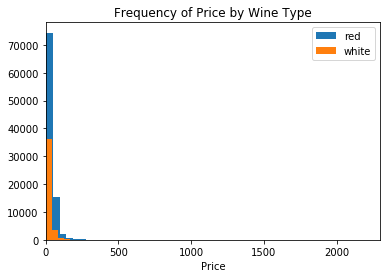

In [28]:
plt.hist(wine_red.price, label = "red", bins = 50)
plt.hist(wine_white.price, label = 'white', bins = 50)
plt.title ('Frequency of Price by Wine Type')
plt.xlim(0,wine_red.price.max())
plt.xlabel('Price')
plt.legend(loc="best")
plt.show()

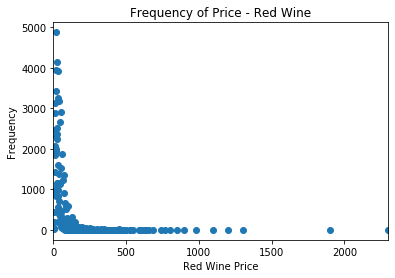

In [29]:
#Alternate way to show skew of prices - PROBABLY DON'T USE
plt.scatter(wine_red.price.value_counts().index, wine_red.price.value_counts().values)
plt.title ('Frequency of Price - Red Wine')
plt.xlim(0,wine_red.price.max())
plt.xlabel('Red Wine Price')
plt.ylabel('Frequency')
plt.show()

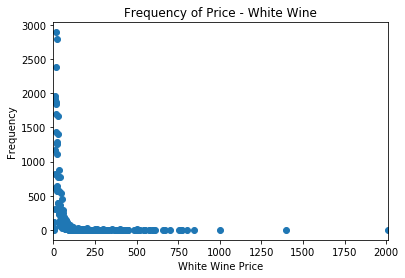

In [30]:
#Alternate way to show skew of prices - DON'T USE
plt.scatter(wine_white.price.value_counts().index, wine_white.price.value_counts().values)
plt.title ('Frequency of Price - White Wine')
plt.xlim(0,wine_white.price.max())
plt.xlabel('White Wine Price')
plt.ylabel('Frequency')
plt.show()

In [31]:
wine_red.price.max()

2300.0

## Points vs Price Correlation - Red vs White

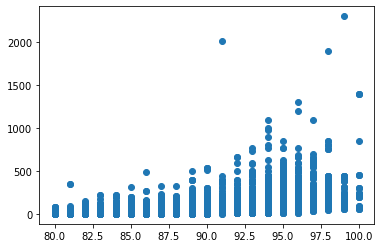

In [32]:
#Scatter of Wine Price vs Wine Points - Total 
plt.scatter(wine_df.points, wine_df.price)

In [33]:
wine_df[['price','points','Still_Red']].corr()

,price,points,Still_Red
price,1.000000,0.459624,0.108498
points,0.459624,1.000000,0.061808
Still_Red,0.108498,0.061808,1.000000


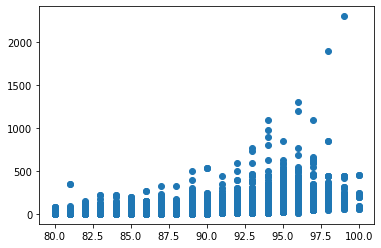

In [34]:
#Scatter of Wine Price vs Wine Points - Red Wine
plt.scatter(wine_red.points, wine_red.price)

           price    points
price   1.000000  0.474773
points  0.474773  1.000000


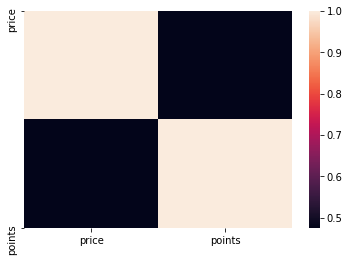

In [35]:
#Correlations - Red Wine
sn.heatmap(wine_red[['price','points']].corr())
print(wine_red[['price','points']].corr())

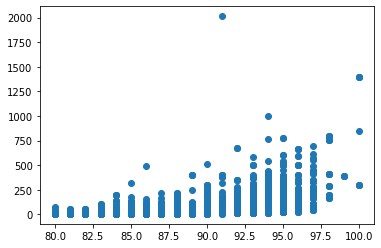

In [36]:
#Scatter of Wine Price vs Wine Points - White Wine
plt.scatter(wine_white.points, wine_white.price)

           price    points
price   1.000000  0.414576
points  0.414576  1.000000


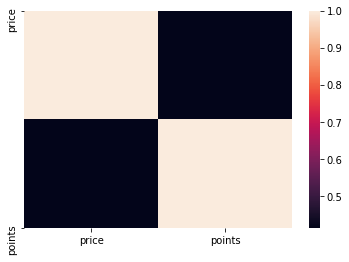

In [37]:
sn.heatmap(wine_white[['price','points']].corr())
print(wine_white[['price','points']].corr())

## Statistical Tests

In [38]:
import scipy.stats as stats

### Red vs White Wine - Points 
* Null Hypothesis - There is no difference in the average points of red and white wines 
* Alternate Hypothesis - There is a difference in the average points of red and white wines
* Outcome - At an alpha of 0.05 and with a p-value of almost zero, we reject the null hypothesis that there is no difference in the average points of red and white whines. We have enough evidence to suggest that there is a statistically significant difference in the average red wine points and the average white wine points. 

In [39]:
#T-Test for red vs whitw wine popularity 
stats.ttest_ind(wine_red.points, wine_white.points, equal_var=False)

Ttest_indResult(statistic=23.349294596442785, pvalue=3.4024913851525474e-120)

In [40]:
wine_red.points.mean()

87.93201032971507

In [41]:
wine_white.points.mean()

87.49904799101694

In [42]:
wine_red.points.count()

93323

In [43]:
wine_white.points.count()

40966

In [44]:
stats.sem(wine_red.points)

0.01076380993151733

In [45]:
stats.sem(wine_white.points)

0.015098923061268945

### Red vs White Wine - Price
* Null Hypothesis - There is no difference in the average price of red and white wines 
* Alternate Hypothesis - There is a difference in the average price of red and white wines
* Outcome - At an alpha of 0.05 and with a p-value of zero, we reject the null hypothesis that there is no difference in the average price of red and white whines. We have enough evidence to suggest that there is a statistically significant difference in the average red wine price and the average white wine price. 

In [46]:
#T-Test for red vs white price 
stats.ttest_ind(wine_red.price, wine_white.price, equal_var=False)

Ttest_indResult(statistic=39.55164412347694, pvalue=0.0)

In [47]:
print(wine_red.price.mean())
print(wine_white.price.mean())
print(stats.sem(wine_red.price))
print(stats.sem(wine_white.price))

35.947665634409525
27.332177903627397
0.11792129941087051
0.18315010059964076


## Data Trimming (Removing Outliers)

(array([9.2937e+04, 3.3400e+02, 3.7000e+01, 8.0000e+00, 3.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   4. ,  233.6,  463.2,  692.8,  922.4, 1152. , 1381.6, 1611.2,
        1840.8, 2070.4, 2300. ]),
 <a list of 10 Patch objects>)

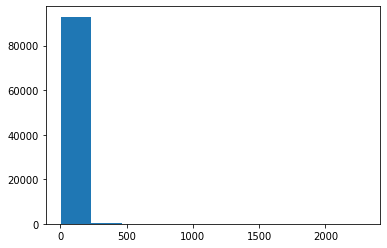

In [48]:
plt.hist(wine_red.price)

In [49]:
import numpy as np 

In [50]:
np.quantile(wine_red.price, 0.975)

110.0

In [51]:
#Trim out the bottom and top 2.5% - CHANGE IF ONLY PREDICTING FOR CHEAP WINES
new_mask = (wine_red.price > np.quantile(wine_red.price, 0.025)) & (wine_red.price < np.quantile(wine_red.price, 0.975))

red_sub = wine_red.loc[new_mask]
red_sub

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,221.0,True,1
5,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,221.0,True,1
7,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,13625.0,True,1
8,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,13625.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134269,France,"This is a lovely, fragrant Burgundy, with a sm...",Clos dea Argillieres,89,52.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Daniel Rion,13625.0,True,1
134270,France,Scents of graham cracker and malted milk choco...,NaN,89,38.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Michel Gros,13625.0,True,1
134271,France,"This needs a good bit of breathing time, then ...",Les Chaliots,87,37.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Michel Gros,13625.0,True,1
134272,France,The nose is dominated by the attractive scents...,Les Charmes,87,65.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Daniel Rion,13625.0,True,1


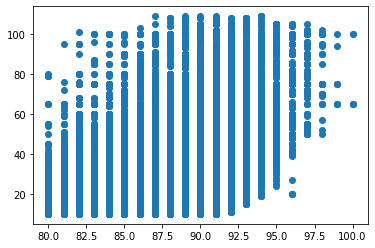

In [52]:
plt.scatter(red_sub.points, red_sub.price)

In [53]:
#SHOW CHANGE IN CORRELATION IN REPORT
red_sub.corr()

,points,price,Counts,Still_Red
points,1.000000,0.538650,0.081764,NaN
price,0.538650,1.000000,0.207736,NaN
Counts,0.081764,0.207736,1.000000,NaN
Still_Red,NaN,NaN,NaN,NaN


In [54]:
wine_red.corr()

,points,price,Counts,Still_Red
points,1.000000,0.474773,0.089191,NaN
price,0.474773,1.000000,0.127757,NaN
Counts,0.089191,0.127757,1.000000,NaN
Still_Red,NaN,NaN,NaN,NaN


In [55]:
red_sub.price.mean()

32.84124487004104

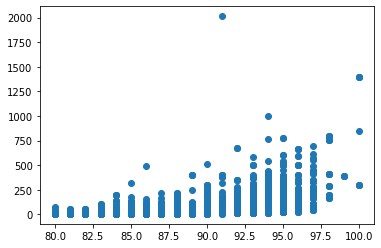

In [56]:
plt.scatter(wine_white.points, wine_white.price)

In [57]:
new_mask2 = (wine_white.price > np.quantile(wine_white.price, 0.025)) & (wine_white.price < np.quantile(wine_white.price, 0.975))

white_sub = wine_white.loc[new_mask2]
white_sub

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
22,US,The apogee of this ambitious winery's white wi...,Giallo Solare,95,60.0,California,Edna Valley,Central Coast,Chardonnay,Center of Effort,13775.0,False,0
24,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River,13775.0,False,0
29,US,"Steely and perfumed, this wine sees only 20% n...",Babushka,90,37.0,California,Russian River Valley,Sonoma,Chardonnay,Zepaltas,13775.0,False,0
31,US,"The aromas entice with notes of wet stone, hon...",Conner Lee Vineyard,90,42.0,Washington,Columbia Valley (WA),Columbia Valley,Chardonnay,Buty,13775.0,False,0
33,France,Gingery spice notes accent fresh pear and melo...,NaN,90,60.0,Rhône Valley,Châteauneuf-du-Pape,NaN,Rhône-style White Blend,Clos de L'Oratoire des Papes,407.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134284,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,2554.0,False,0
134285,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,1003.0,False,0
134286,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,2554.0,False,0
134287,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,1003.0,False,0


In [58]:
white_sub.corr()

,points,price,Counts,Still_Red
points,1.000000,0.536413,0.040876,NaN
price,0.536413,1.000000,0.173914,NaN
Counts,0.040876,0.173914,1.000000,NaN
Still_Red,NaN,NaN,NaN,NaN


In [59]:
wine_white.corr()

,points,price,Counts,Still_Red
points,1.000000,0.414576,0.043053,NaN
price,0.414576,1.000000,0.076988,NaN
Counts,0.043053,0.076988,1.000000,NaN
Still_Red,NaN,NaN,NaN,NaN


In [60]:
white_sub.price.mean()

23.84170440510498

In [61]:
wine_sub = red_sub.append(white_sub)
wine_sub

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,221.0,True,1
5,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,221.0,True,1
7,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,13625.0,True,1
8,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,13625.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134284,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,2554.0,False,0
134285,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,1003.0,False,0
134286,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,2554.0,False,0
134287,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,1003.0,False,0


In [62]:
wine_sub.corr()

,points,price,Counts,Still_Red
points,1.000000,0.535937,0.066897,0.070902
price,0.535937,1.000000,0.184860,0.222282
Counts,0.066897,0.184860,1.000000,-0.025279
Still_Red,0.070902,0.222282,-0.025279,1.000000


In [63]:
wine_sub.describe()

,points,price,Counts,Still_Red
count,126584.000000,126584.000000,126584.000000,126584.000000
mean,87.767245,30.078193,6363.028124,0.692979
std,3.093177,18.675083,5155.713547,0.461260
min,80.000000,9.000000,30.000000,0.000000
25%,86.000000,16.000000,1455.000000,0.000000
50%,88.000000,25.000000,4987.000000,1.000000
75%,90.000000,39.000000,12671.000000,1.000000
max,100.000000,109.000000,13775.000000,1.000000


In [64]:
#get the top ten wine producing countries
mask9 = wine_sub.country.isin(wine_sub.country.value_counts().index[0:9])
top_wines = wine_sub.loc[mask9]

#select specific data points
select_wines = top_wines[[ 'points', 'price', 'Still_Red']]

#dummify the countries - 1 if the wine is from X country, 0 if it isn't
dummy_wines = pd.get_dummies(top_wines.country)

In [65]:
#join the dummy columns to the original df
full_dummy = select_wines.join(dummy_wines)
full_dummy.corr()

,points,price,Still_Red,Argentina,Australia,Chile,France,Italy,New Zealand,Portugal,Spain,US
points,1.000000,0.539262,0.082539,-0.110656,0.008028,-0.087819,0.052769,0.080276,-0.011449,0.041109,-0.079011,0.014230
price,0.539262,1.000000,0.230951,-0.112325,-0.029218,-0.122933,0.024949,0.069351,-0.054175,-0.042771,-0.077625,0.109578
Still_Red,0.082539,0.230951,1.000000,0.068105,-0.008425,0.000460,-0.111275,0.018708,-0.121567,0.023034,0.068709,0.030987
Argentina,-0.110656,-0.112325,0.068105,1.000000,-0.041730,-0.044770,-0.073815,-0.087001,-0.034249,-0.036032,-0.052014,-0.212660
Australia,0.008028,-0.029218,-0.008425,-0.041730,1.000000,-0.042449,-0.069988,-0.082491,-0.032473,-0.034164,-0.049317,-0.201635
Chile,-0.087819,-0.122933,0.000460,-0.044770,-0.042449,1.000000,-0.075088,-0.088501,-0.034839,-0.036653,-0.052910,-0.216326
France,0.052769,0.024949,-0.111275,-0.073815,-0.069988,-0.075088,1.000000,-0.145916,-0.057441,-0.060432,-0.087236,-0.356666
Italy,0.080276,0.069351,0.018708,-0.087001,-0.082491,-0.088501,-0.145916,1.000000,-0.067703,-0.071227,-0.102819,-0.420380
New Zealand,-0.011449,-0.054175,-0.121567,-0.034249,-0.032473,-0.034839,-0.057441,-0.067703,1.000000,-0.028039,-0.040476,-0.165488
Portugal,0.041109,-0.042771,0.023034,-0.036032,-0.034164,-0.036653,-0.060432,-0.071227,-0.028039,1.000000,-0.042583,-0.174102


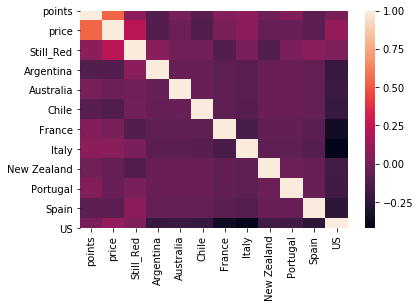

In [66]:
sn.heatmap(full_dummy.corr())

### Regression Analysis - Linear 

In [67]:
import statsmodels.api as sm

In [68]:
#set x and y for regression analysis
X = full_dummy.drop('price', axis =1)
# X = prof_booth[['points','Still_Red']]
y = full_dummy[["price"]]

In [69]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)
# Print out the statistics
model.summary()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     6336.
Date:                Sat, 09 May 2020   Prob (F-statistic):               0.00
Time:                        12:41:00   Log-Likelihood:            -4.8716e+05
No. Observations:              117681   AIC:                         9.744e+05
Df Residuals:                  117670   BIC:                         9.745e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -221.2869      1.141   -193.906      0.000    -223.524    -219.050
points          3.0485      0.015    209.871      0.000       3.020       3.077
Still_Red       8.1038      0.100     81.344      0.000       7.909       8.299
Argentina     -27.9245      0.228   -122.213      0.000     -28.372     -27.477
Australia     -24.6496      0.249    -98.839      0.000     -25.138     -24.161
Chile         -28.6038      0.228   -125.435      0.000     -29.051     -28.157
France        -20.5781      0.192   -107.151      0.000     -20.955     -20.202
Italy         -20.5101      0.183   -112.063      0.000     -20.869     -20.151
New Zealand   -24.4948      0.286    -85.784      0.000     -25.054     -23.935
Portugal      -29.1171      0.280   -104.169      0.000     -29.665     -28.569
Spain         -25.5453      0.210   -121.641      0.000     -25.957     -25.134
US            -19.8635      0.154   -128.972      0.000     -20.165     -19.562
==============================================================================
Omnibus:                    25897.356   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56353.331
Skew:                           1.277   Prob(JB):                         0.00
Kurtosis:                       5.230   Cond. No.                     8.02e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

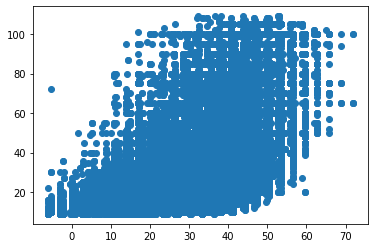

In [70]:
#Plot predicitions vs actual to see accuracy of model
plt.scatter(predictions, y)

## Random Fun with Alexander (Random Forest Regressor)

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
# Labels are the values we want to predict
#labels = np.array(prof_booth['price'])
# Remove the labels from the features
# axis 1 refers to the columns
#features= prof_booth.drop('price', axis = 1)
# Saving feature names for later use
#feature_list = list(features.columns)
# Convert to numpy array
#features = np.array(features)

In [74]:
# Using Skicit-learn to split data into training and testing sets
#from sklearn.model_selection import train_test_split
# Split the data into training and testing sets - want to aim for 75% of data used to train, then test on remaining 25%
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [75]:
# Instantiate model with 100 decision trees
#rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
#rf.fit(train_features, train_labels);

In [76]:
#bring back correlation coefficient? or is this the r-squared? 
#rf.score(test_features, test_labels)

In [77]:
# Use the forest's predict method on the test data
#predictions = rf.predict(test_features)
# Calculate the absolute errors
#errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

In [78]:
#list(zip(feature_list, rf.feature_importances_))

In [79]:
#plt.scatter(predictions, test_labels)

## More Fun - Simple Regression Model

In [80]:
lm = LinearRegression()

In [81]:
#lm.fit(train_features, train_labels)

In [82]:
#predictions_lm = lm.predict(test_features)

# Calculate the absolute errors
#errors = abs(predictions_lm - test_labels)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

In [83]:
#lm.score(test_features, test_labels)

In [84]:
#plt.scatter(predictions_lm, test_labels)

In [85]:
#list(zip(feature_list,lm.coef_))

In [86]:
#lm.intercept_

In [87]:
red2.reset_index(drop=True)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12671.0,True,1
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,221.0,True,1
2,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
3,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,221.0,True,1
4,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,221.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92541,France,"This is a lovely, fragrant Burgundy, with a sm...",Clos dea Argillieres,89,52.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Daniel Rion,13625.0,True,1
92542,France,Scents of graham cracker and malted milk choco...,NaN,89,38.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Michel Gros,13625.0,True,1
92543,France,"This needs a good bit of breathing time, then ...",Les Chaliots,87,37.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Michel Gros,13625.0,True,1
92544,France,The nose is dominated by the attractive scents...,Les Charmes,87,65.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Daniel Rion,13625.0,True,1


In [88]:
winery_price_group = red2.groupby(["winery"]).agg({"price": ["mean", "median","var", "std", "sem"]})
winery_price_group

price                                        
                         mean median         var        std       sem
winery                                                               
1+1=3               15.800000   17.0    6.177778   2.485514  0.785988
10 Knots            23.285714   23.0  108.571429  10.419761  3.938300
1000 Stories        19.000000   19.0         NaN        NaN       NaN
1040FU              25.000000   25.0         NaN        NaN       NaN
10Span              15.000000   15.0    0.000000   0.000000  0.000000
...                       ...    ...         ...        ...       ...
Éric & Jöel Durand  39.000000   39.0         NaN        NaN       NaN
Ñandú               15.333333   17.0    8.333333   2.886751  1.666667
Único Luis Miguel   15.000000   15.0    0.000000   0.000000  0.000000
àMaurice            38.567568   35.0   31.807808   5.639841  0.927184
áster               26.000000   26.0         NaN        NaN       NaN

[11436 rows x 5 columns]

In [89]:
wine_red = wine_red.drop("Counts", axis = 1)

In [90]:
bins = [79, 82, 86, 89, 93, 97, 100]
points_labels = ["ACCEPTABLE", "GOOD","VERY GOOD", "EXCELLENT", "SUPERB", "CLASSIC"]

wine_red["Wine Points Ranges"] = pd.cut(wine_red.points, bins, labels=points_labels)

points_group = wine_red.groupby("Wine Points Ranges")

points_count = points_group["Wine Points Ranges"].count()
price_avg = points_group["price"].mean()

points_summary = pd.DataFrame({"Avg Price": price_avg, "Wine Count": points_count})
points_summary

,Avg Price,Wine Count
Wine Points Ranges,,
ACCEPTABLE,19.883348,4432
GOOD,22.028680,26778
VERY GOOD,29.941696,31130
EXCELLENT,48.955550,26794
SUPERB,99.166625,4045
CLASSIC,220.888889,144


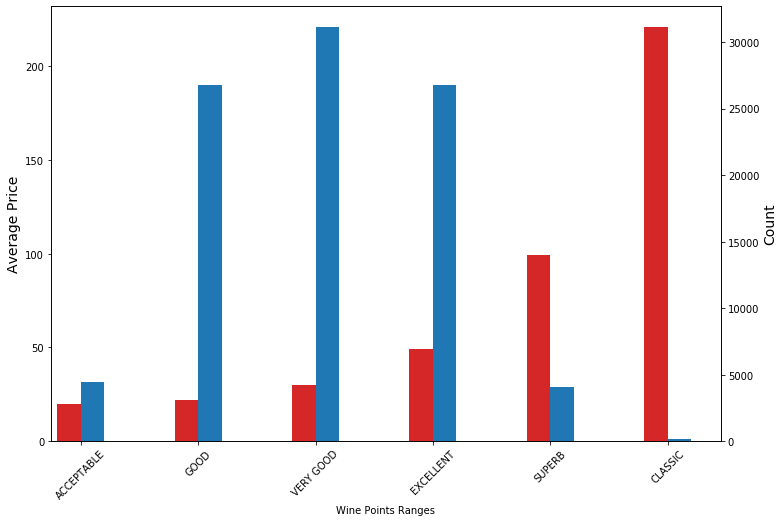

In [91]:
fig = plt.figure(figsize=(12,8)) 

ax = fig.add_subplot() 
ax2 = ax.twinx()

width = 0.2

points_summary["Avg Price"].plot(kind='bar', color='tab:red', ax=ax, width=width, position=1, rot=45)
points_summary["Wine Count"].plot(kind='bar', color='tab:blue', ax=ax2, width=width, position=0, rot=45)

ax.set_ylabel('Average Price', fontsize = 14)
ax2.set_ylabel('Count', fontsize = 14)

plt.show()

In [92]:
bins = [79, 82, 86, 89, 93, 97, 100]
points_labels = ["ACCEPTABLE", "GOOD","VERY GOOD", "EXCELLENT", "SUPERB", "CLASSIC"]

wine_white["Wine Points Ranges"] = pd.cut(wine_white.points, bins, labels=points_labels)
wine_white = wine_white.reset_index(drop=True)

points_group2 = wine_white.groupby("Wine Points Ranges")

points_count2 = points_group2["Wine Points Ranges"].count()
price_avg2 = points_group2["price"].mean()

points_summary2 = pd.DataFrame({"Avg Price": price_avg2, "Count": points_count2})
points_summary2

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Avg Price,Count
Wine Points Ranges,,
ACCEPTABLE,15.260509,1689
GOOD,17.014956,14108
VERY GOOD,23.123146,14357
EXCELLENT,39.546836,9544
SUPERB,104.164649,1239
CLASSIC,530.827586,29


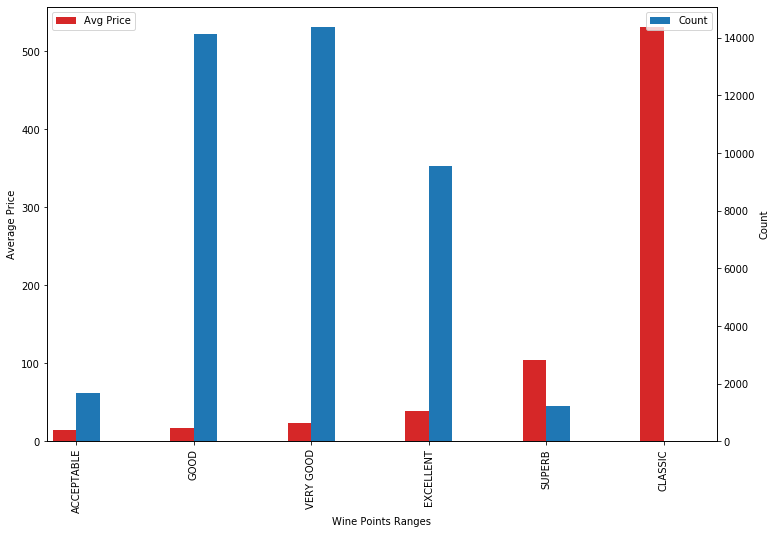

In [93]:
fig = plt.figure(figsize=(12,8)) 

ax = fig.add_subplot() 
ax2 = ax.twinx()

width = 0.2

points_summary2["Avg Price"].plot(kind='bar', color='tab:red', ax=ax, width=width, position=1)
points_summary2["Count"].plot(kind='bar', color='tab:blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Average Price')
ax2.set_ylabel('Count')

ax.legend()
ax2.legend()

plt.show()

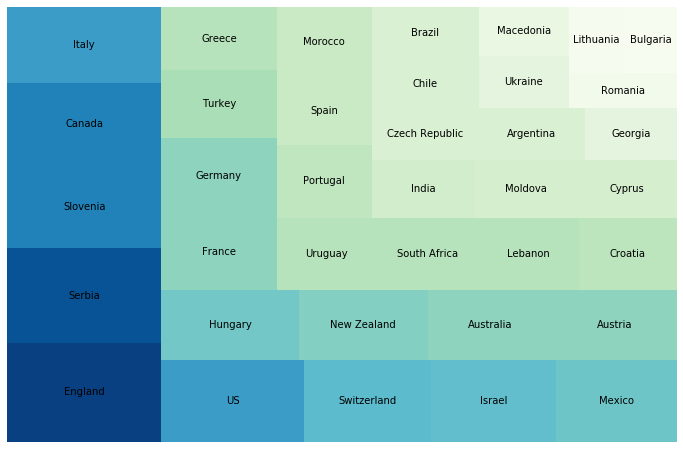

In [94]:
cnt = wine_red.groupby(['country',])['price'].median().sort_values(ascending=False).to_frame()

#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(cnt.price), vmax=max(cnt.price))
colors = [matplotlib.cm.GnBu(norm(value)) for value in cnt.price]


plt.figure(figsize=(12,8))
ax = squarify.plot(cnt['price'].fillna(0.1),color=colors,label=cnt.index)
plt.axis('off')
plt.show()

In [95]:
cnt

,price
country,
England,42.0
Serbia,40.0
Slovenia,35.0
Canada,35.0
Italy,32.0
US,32.0
Switzerland,28.5
Israel,28.0
Mexico,27.0


In [96]:
mask0 = wine_red.country == "US"
us_states = wine_red.loc[mask0]

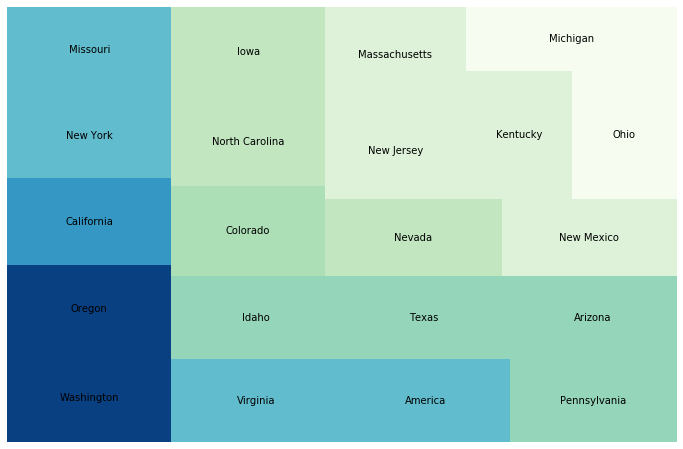

In [97]:
d = us_states.groupby(['province'])['points'].median().sort_values(ascending=False).to_frame()

norm = matplotlib.colors.Normalize(vmin=min(d.points), vmax=max(d.points))
colors = [matplotlib.cm.GnBu(norm(value)) for value in d.points]

plt.figure(figsize=(12,8))
squarify.plot(d['points'].fillna(0.1),color=colors,label=d.index)
plt.axis('off')
plt.show()

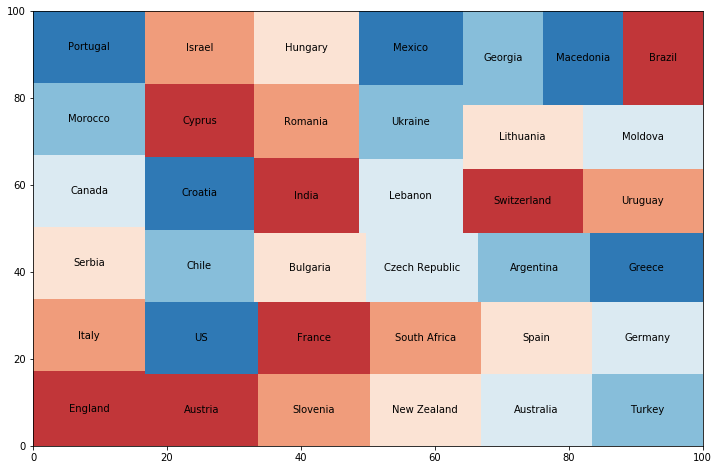

In [98]:
points_tree = wine_red.groupby(['country',])['points'].median().sort_values(ascending=False).to_frame()
plt.figure(figsize=(12,8))
squarify.plot(points_tree['points'].fillna(0.1),color=sn.color_palette('RdBu'),label=points_tree.index)

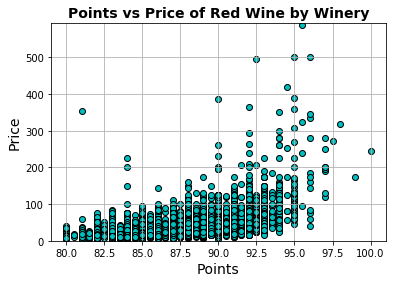

In [99]:
winery_gp = wine_red.groupby(["winery"])
#wine_type = [list[0] for list in winery_group["winery"].unique()]
#q = winery_group.price.mean()

x_values = winery_gp.points.median()
y_values = winery_gp.price.median()

plt.scatter(x_values, y_values,color = "c", edgecolor = "black")
plt.xlabel("Points", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.ylim(0, max(y_values)+5)
plt.title("Points vs Price of Red Wine by Winery", fontsize = 14, fontweight="bold")
plt.grid()
plt.show()

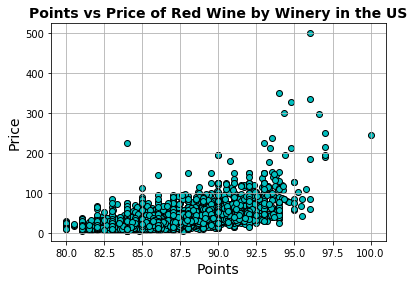

In [100]:
wine_red_mask = wine_red.country == "US"
wine_red_mask = wine_red.loc[wine_red_mask]
winery_red_gp = wine_red_mask.groupby(["winery"])

x_values = winery_red_gp.points.mean()
y_values = winery_red_gp.price.mean()

plt.scatter(x_values, y_values,color = "c", edgecolor = "black")
plt.xlabel("Points", fontsize = 14)
plt.ylabel("Price", fontsize = 14)

plt.title("Points vs Price of Red Wine by Winery in the US", fontsize = 14, fontweight="bold")
plt.grid()
plt.show()

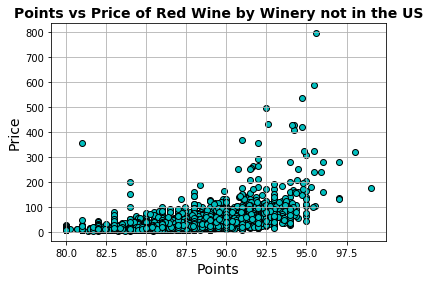

In [101]:
wine_red_mask1 = wine_red.country != "US"
wine_red_mask1 = wine_red.loc[wine_red_mask1]
winery_red_gp1 = wine_red_mask1.groupby(["winery"])

x_values = winery_red_gp1.points.mean()
y_values = winery_red_gp1.price.mean()

plt.scatter(x_values, y_values,color = "c", edgecolor = "black")
plt.xlabel("Points", fontsize = 14)
plt.ylabel("Price", fontsize = 14)

plt.title("Points vs Price of Red Wine by Winery not in the US", fontsize = 14, fontweight="bold")
plt.grid()
plt.show()

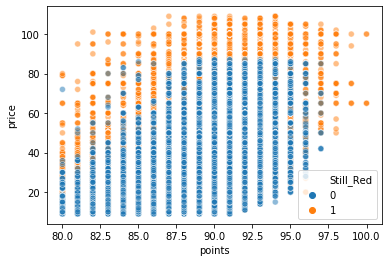

In [102]:
ax = sn.scatterplot(x="points", y="price", hue="Still_Red", data=wine_sub, alpha = 0.5)

In [103]:
wine_rating = wine_sub.groupby(["winery"])
print(len(wine_rating))
print(len(wine_sub))

13231
126584


The r-squared is: 0.2901443299014165


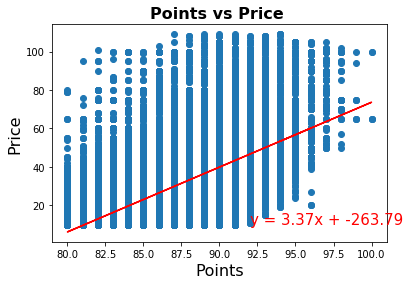

In [104]:
x_values = red_sub.points
y_values = red_sub.price
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(92,10),fontsize=15,color="red")
plt.title('Points vs Price ', fontsize = 16, fontweight="bold")
plt.xlabel('Points', fontsize = 16)
plt.ylabel('Price', fontsize = 16)
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.2877391603690037


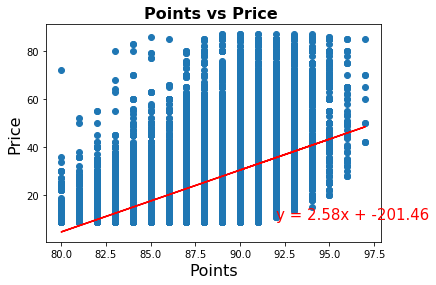

In [105]:
x_values = white_sub.points
y_values = white_sub.price
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(92,10),fontsize=15,color="red")
plt.title('Points vs Price ', fontsize = 16, fontweight="bold")
plt.xlabel('Points', fontsize = 16)
plt.ylabel('Price', fontsize = 16)
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [106]:
wine_sub["price"] = wine_sub["price"].map("${0:.2f}".format)
wine_sub

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,$65.00,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,$73.00,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,221.0,True,1
5,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,$65.00,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,221.0,True,1
7,US,This re-named vineyard was formerly bottled as...,Silice,95,$65.00,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,13625.0,True,1
8,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,$60.00,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,13625.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134284,Italy,Many people feel Fiano represents southern Ita...,NaN,91,$20.00,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,2554.0,False,0
134285,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,$27.00,Champagne,Champagne,NaN,Champagne Blend,H.Germain,1003.0,False,0
134286,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,$20.00,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,2554.0,False,0
134287,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,$52.00,Champagne,Champagne,NaN,Champagne Blend,Gosset,1003.0,False,0


In [107]:
wine_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12671.0,True,1
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,221.0,True,1
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,6054.0,False,0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,221.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134284,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,2554.0,False,0
134285,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,1003.0,False,0
134286,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,2554.0,False,0
134287,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,1003.0,False,0


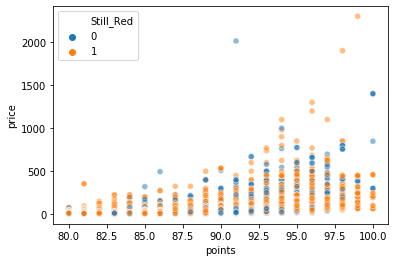

In [108]:
ax = sn.scatterplot(x="points", y="price", hue="Still_Red", data=wine_df, alpha = 0.5)